In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

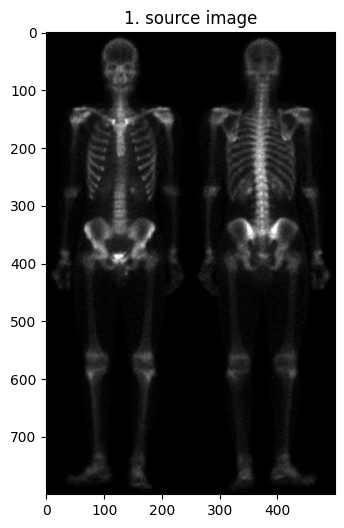

In [56]:
source_image = cv2.imread('/content/sample_data/x-ray.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,6))
plt.imshow(source_image, 'gray')
plt.title('1. source image')
plt.show()

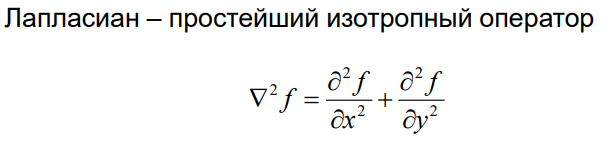

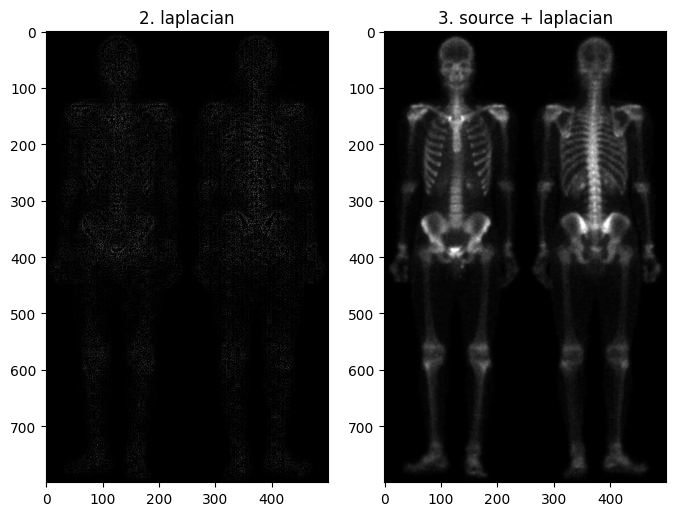

In [61]:
# Using cv2.Laplacian for computing
laplacian = cv2.Laplacian(source_image, cv2.CV_8U, ksize=1)

# Add laplacian to source image to enhance contours
image = cv2.bitwise_or(source_image, laplacian)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(laplacian, 'gray')
plt.title('2. laplacian')
plt.subplot(1,2,2)
plt.imshow(image, 'gray')
plt.title('3. source + laplacian')
plt.show()

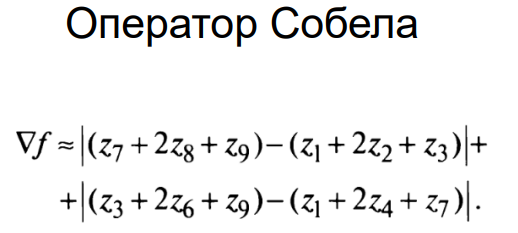

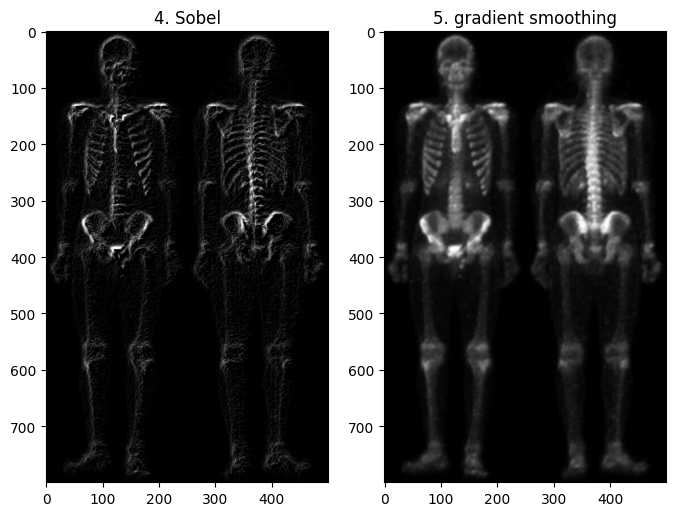

In [62]:
# Sobel operator
sobel_x = cv2.Sobel(image,cv2.CV_8U,1,0,ksize=3)
sobel_y = cv2.Sobel(image,cv2.CV_8U,0,1,ksize=3)
sobel = cv2.bitwise_or(sobel_x, sobel_y)
image_sobel = cv2.bitwise_or(sobel, image)

# Smoothing
gradient_smoothing = cv2.blur(image_sobel, (5, 5))

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(sobel, 'gray')
plt.title('4. Sobel')
plt.subplot(1,2,2)
plt.imshow(gradient_smoothing, 'gray')
plt.title('5. gradient smoothing')
plt.show()

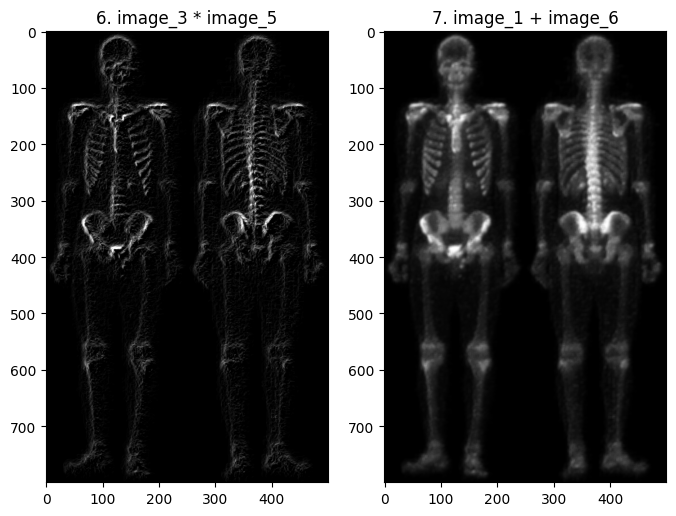

In [63]:
# Multiplication 3 and 5
image_6 = cv2.bitwise_and(image, gradient_smoothing)

# Add 1 to 6
image_7 = cv2.bitwise_or(source_image, gradient_smoothing)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(sobel, 'gray')
plt.title('6. image_3 * image_5')
plt.subplot(1,2,2)
plt.imshow(gradient_smoothing, 'gray')
plt.title('7. image_1 + image_6')
plt.show()

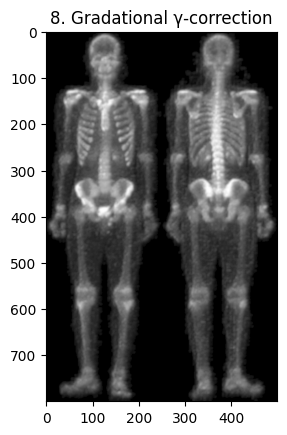

In [64]:
# Gradational γ-correction (γ=0.5 s=1)
final_image = np.power(gradient_smoothing / 255.0, 0.5) * 255

plt.imshow(final_image, 'gray')
plt.title('8. Gradational γ-correction')
plt.show()